### imports

In [45]:
import numpy as np
import math

from matplotlib import pyplot as plt

## Fuzzy Sets Definition

In [46]:
def getX(maxX = 1, sampleSize = 200) -> np.array:
    return np.linspace(0, maxX, sampleSize)

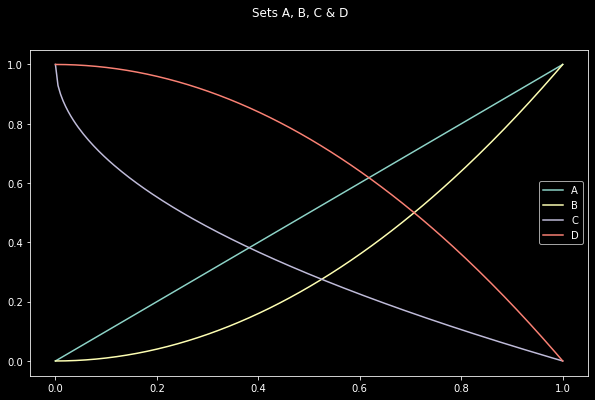

In [47]:

X = getX()

# Define fuzzy sets used for the tests
A = np.apply_along_axis(lambda x: x, arr=X, axis=0)
B = np.apply_along_axis(lambda x: x**2, arr=X, axis=0)
C = np.apply_along_axis(lambda x: 1 - np.sqrt(x), arr=X, axis=0)
D = np.apply_along_axis(lambda x: 1 - x**2, arr=X, axis=0)

zeroSet = np.zeros( X.shape )
oneSet = np.ones( X.shape )

figure = plt.figure(figsize=(10, 6))
gridShape = (1, 1)
legendLocation = 'right'

a = plt.subplot2grid(gridShape, (0, 0), fig=figure)
a.plot(X, A, label='A')
a.plot(X, B, label='B')
a.plot(X, C, label='C')
a.plot(X, D, label='D')

a.legend(loc=legendLocation)
figure.suptitle('Sets A, B, C & D')
plt.show()

## 03: Prove that _Sugeno's Complement_ complies with the axioms `n1`, `n2`, and `n4`
$N(a) = \frac{1 -a} {1 + sa}; \text{ } \text{ } s \in (-1, \infty)$

In [48]:
S = [-.99, 0, 5, 10, 20]

def sugenosComplement(setA: np.array, s: float) -> np.array:
    f = lambda a: (1 - a) / (1 + s*a)
    return np.array(list(map(f, setA)))

### Axiom n1:
$N(0) = 1 \text{; } \text{  } N(1) = 0$

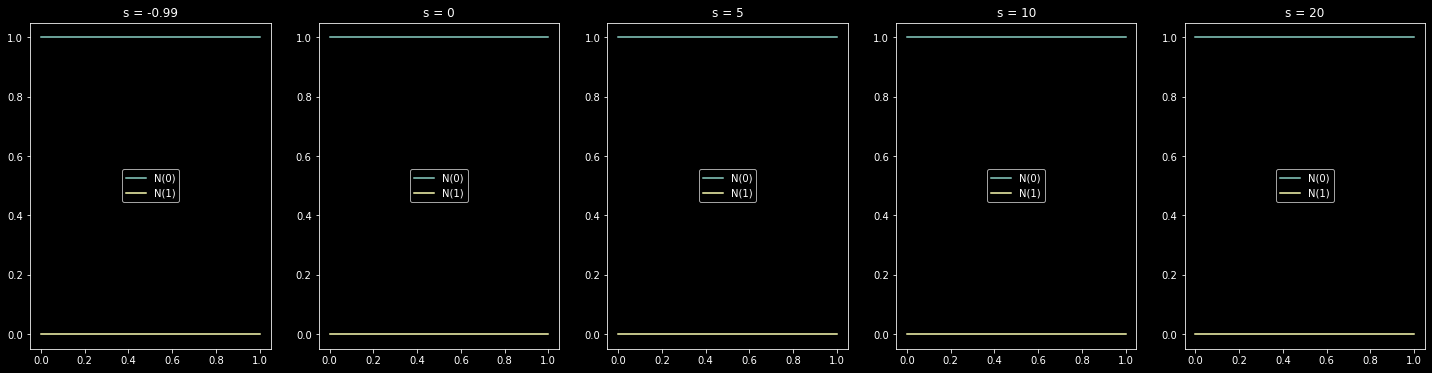

In [49]:
figure = plt.figure(figsize=(25, 6))
gridShape = (1, 5)

for i, s in enumerate(S):
    n0 = sugenosComplement(zeroSet, s)
    n1 = sugenosComplement(oneSet, s)

    axes = plt.subplot2grid(gridShape, (0, i), fig=figure)
    axes.plot(X, n0, label='N(0)')
    axes.plot(X, n1, label='N(1)')

    axes.set_title('s = ' + str(s))
    axes.legend(loc='center')

plt.show()

### Axiom n2:
$a \le b \longrightarrow N(a) \ge N(b)$

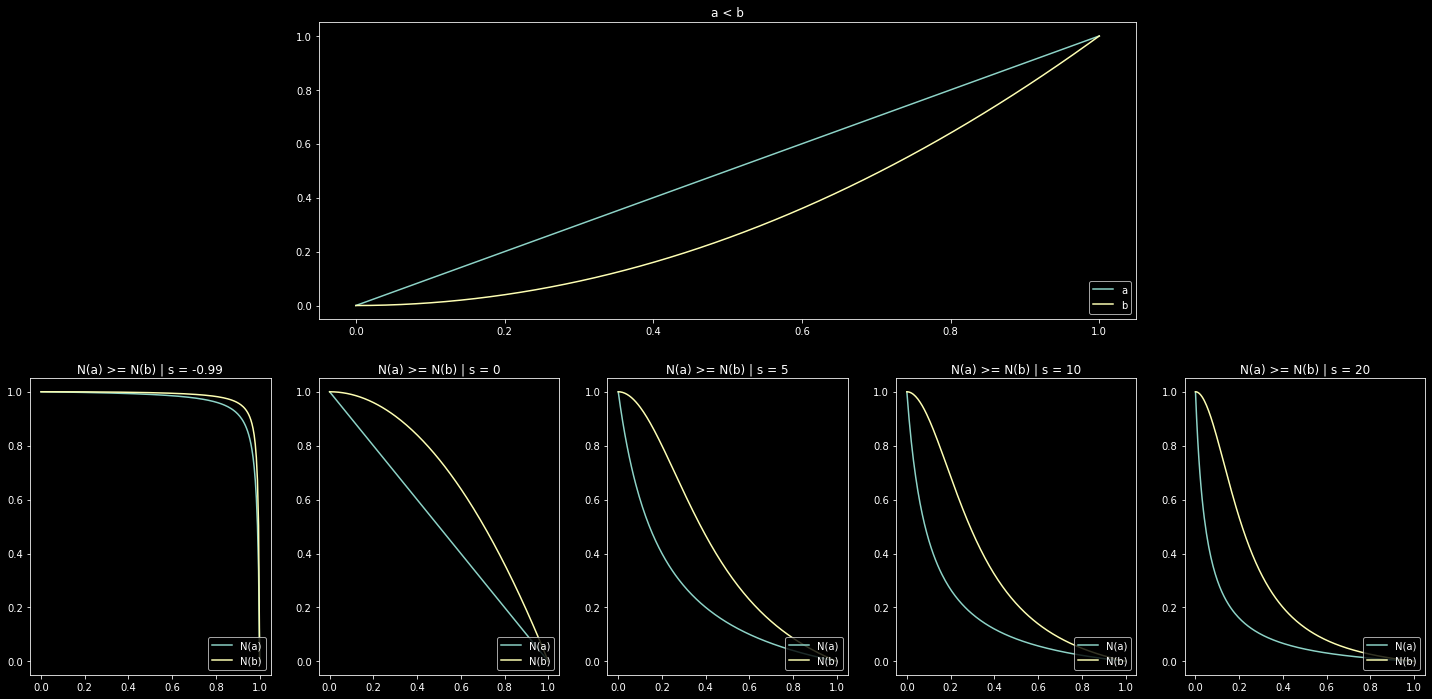

In [50]:
a = A
b = B

figure = plt.figure(figsize=(25, 12))

a11 = plt.subplot2grid((2, 5), (0, 1), fig=figure, colspan=3)
a11.plot(X, a, label='a')
a11.plot(X, b, label='b')

a11.set_title('a < b')
a11.legend(loc='lower right')

# for s in S:
for i, s in enumerate(S):
    
    n_a = sugenosComplement(a, s)
    n_b = sugenosComplement(b, s)

    axes = plt.subplot2grid((2, 5), (1, i), fig=figure)
    axes.plot(X, n_a, label='N(a)')
    axes.plot(X, n_b, label='N(b)')

    axes.set_title('N(a) >= N(b) | s = ' + str(s))
    axes.legend(loc='lower right')
    
plt.show()

### Axiom n4:
$N(N(a)) = a$

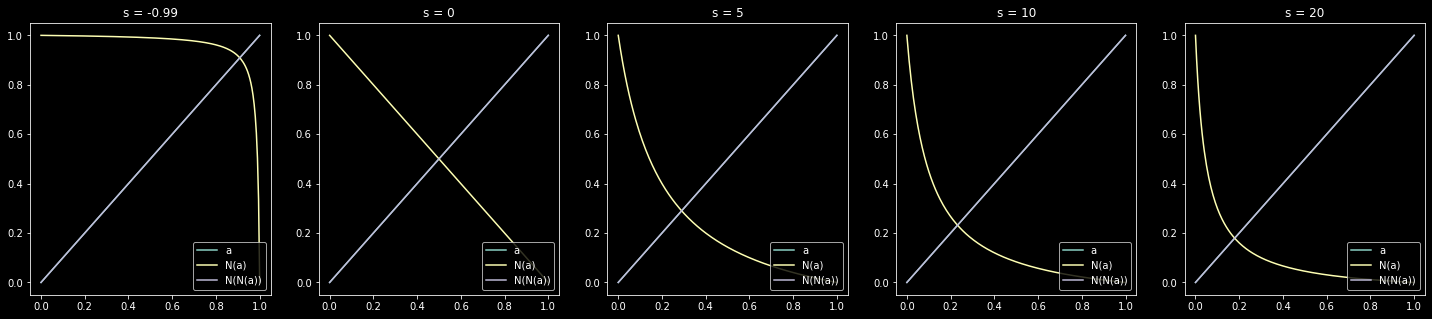

In [51]:
a = A

figure = plt.figure(figsize=(25, 5))
gridShape = (1, 5)

for i, s in enumerate(S):
    
    n_a = sugenosComplement(a, s)
    n_n_a = sugenosComplement(n_a, s)

    axes = plt.subplot2grid(gridShape, (0, i), fig=figure)
    axes.plot(X, a, label='a')
    axes.plot(X, n_a, label='N(a)')
    axes.plot(X, n_n_a, label='N(N(a))')

    axes.set_title('s = ' + str(s))
    axes.legend(loc='lower right')

plt.show()

## 04: Prove that _Probabilistic Sum_ complies with the axioms `s1`, `s2`, `s3`, `s4` and `s5`

In [52]:
def probabilisticSum(setA: np.array, setB: np.array) -> np.array:
    f = lambda a, b: a + b - a*b
    return np.array(list(map(f, setA, setB)))

### Axiom s2:
$a \le c \text{; } \text{  } b \le d \longrightarrow S(a, b) \le S(c, d)$

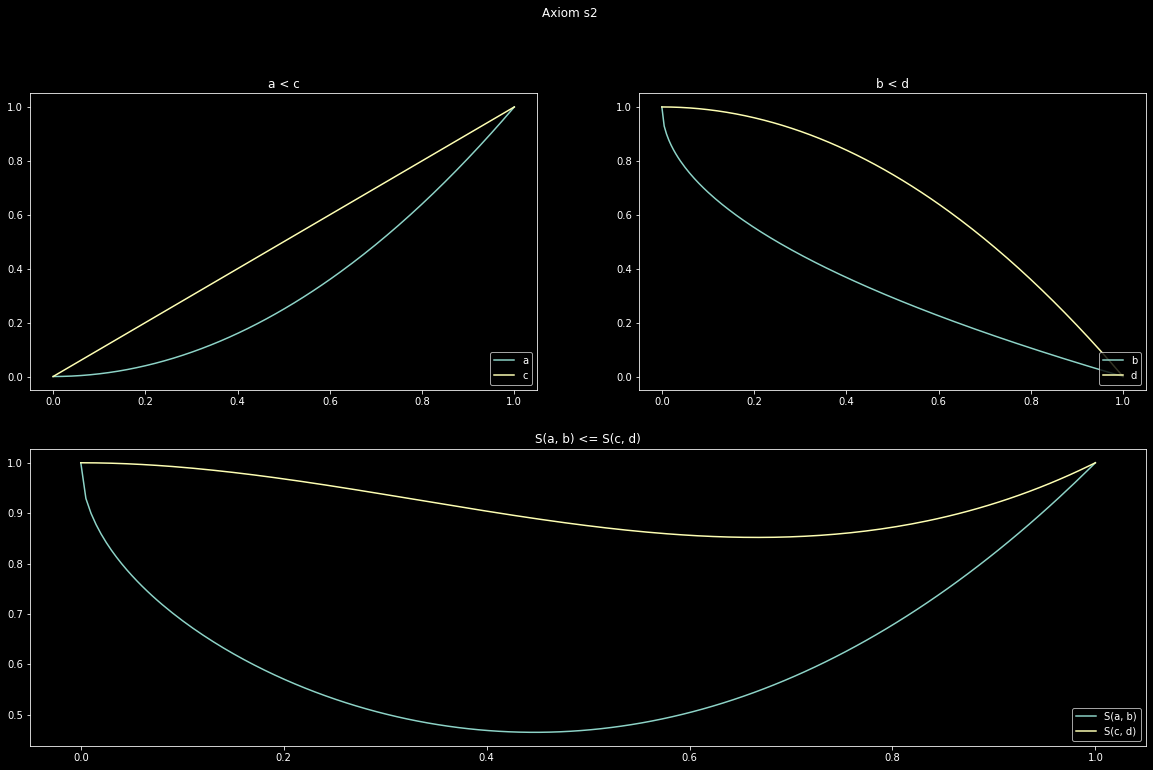

In [53]:
a = B
b = C
c = A
d = D

# Graph: a < c
figure = plt.figure(figsize=(20, 12))
gridShape = (2, 2)
legendLocation = 'lower right'

a11 = plt.subplot2grid(gridShape, (0, 0), fig=figure)
a11.plot(X, a, label='a')
a11.plot(X, c, label='c')

a11.set_title('a < c')
a11.legend(loc=legendLocation)

# Graph: b < d
a12 = plt.subplot2grid(gridShape, (0, 1), fig=figure)
a12.plot(X, b, label='b')
a12.plot(X, d, label='d')

a12.set_title('b < d')
a12.legend(loc=legendLocation)

# Graph: S(a, b) <= S(c, d)
S_ab = probabilisticSum(a, b)
S_cd = probabilisticSum(c, d)

a2 = plt.subplot2grid(gridShape, (1, 0), fig=figure, colspan=2)
a2.plot(X, S_ab, label='S(a, b)')
a2.plot(X, S_cd, label='S(c, d)')

a2.set_title('S(a, b) <= S(c, d)')
a2.legend(loc=legendLocation)
    
figure.suptitle('Axiom s2')
plt.show()

### Axiom s3:
$S(a, b) = S()b, a)$

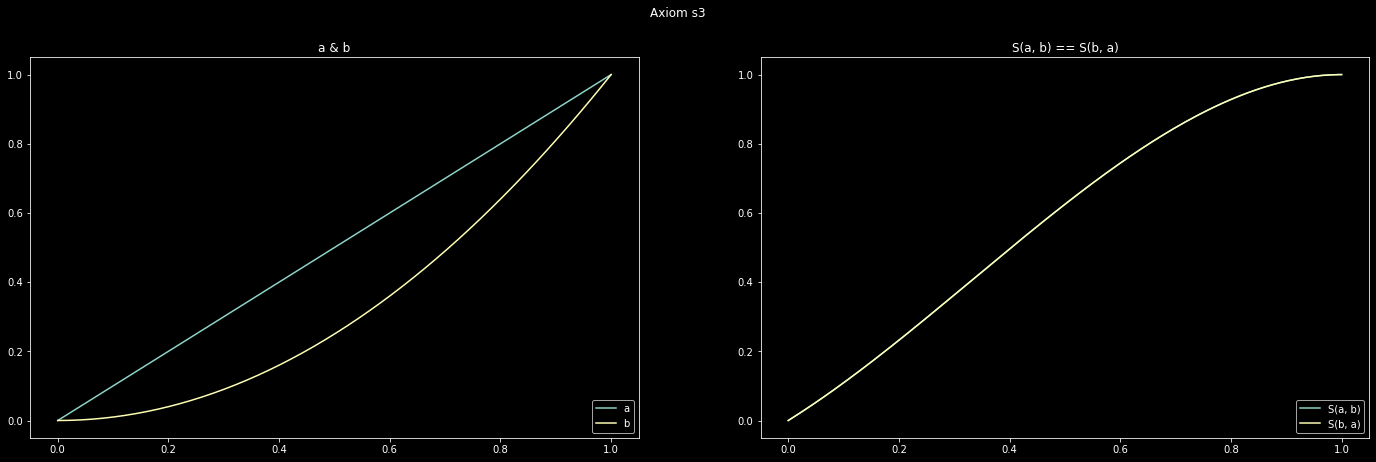

In [54]:
a = A
b = B

# Graph: a & b
figure = plt.figure(figsize=(24, 7))
gridShape = (1, 2)
legendLocation = 'lower right'

a1 = plt.subplot2grid(gridShape, (0, 0), fig=figure)
a1.plot(X, a, label='a')
a1.plot(X, b, label='b')

a1.set_title('a & b')
a1.legend(loc=legendLocation)

# Graph: S(a, b) === S(b, a)
S_ab = probabilisticSum(a, b)
S_ba = probabilisticSum(b, a)

a2 = plt.subplot2grid(gridShape, (0, 1), fig=figure)
a2.plot(X, S_ab, label='S(a, b)')
a2.plot(X, S_ba, label='S(b, a)')

a2.set_title('S(a, b) == S(b, a)')
a2.legend(loc=legendLocation)
    
figure.suptitle('Axiom s3')
plt.show()

### Axiom s4:
$S(a, 𝑆(𝑏, c)) = S(𝑆(𝑎, 𝑏), c)$

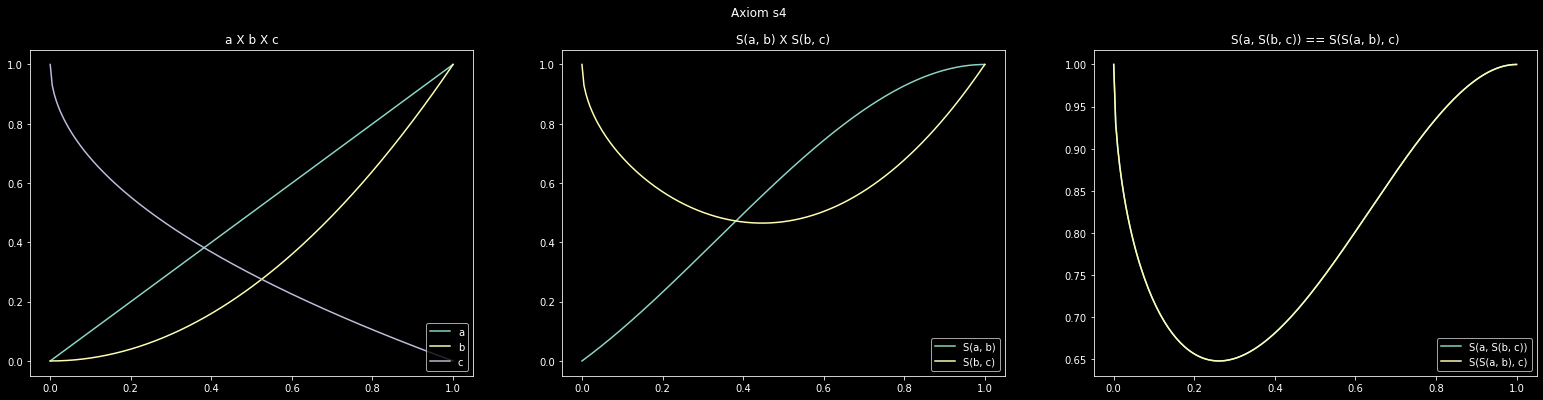

In [55]:
a = A
b = B
c = C

S_ab = probabilisticSum(a, b)
S_bc = probabilisticSum(b, c)

S_a_bc = probabilisticSum(a, S_bc)
S_ab_c = probabilisticSum(S_ab, c)


figure = plt.figure(figsize=(27, 6))
gridShape = (1, 3)
legendLocation = 'lower right'

# Graph: 01
a1 = plt.subplot2grid(gridShape, (0, 0), fig=figure)
a1.plot(X, a, label='a')
a1.plot(X, b, label='b')
a1.plot(X, c, label='c')

a1.set_title('a X b X c')
a1.legend(loc=legendLocation)

# Graph: 02
a2 = plt.subplot2grid(gridShape, (0, 1), fig=figure)
a2.plot(X, S_ab, label='S(a, b)')
a2.plot(X, S_bc, label='S(b, c)')

a2.set_title('S(a, b) X S(b, c)')
a2.legend(loc=legendLocation)

# Graph: 03
a3 = plt.subplot2grid(gridShape, (0, 2), fig=figure)
a3.plot(X, S_a_bc, label='S(a, S(b, c))')
a3.plot(X, S_ab_c, label='S(S(a, b), c)')

a3.set_title('S(a, S(b, c)) == S(S(a, b), c)')
a3.legend(loc=legendLocation)
    
figure.suptitle('Axiom s4')
plt.show()

## 05: Prove that _Limited Sum_ complies with the axioms `s1`, `s2`, `s3`, `s4` and `s5`

In [56]:

def limitedSum(setA: np.array, setB: np.array) -> np.array:
    f = lambda a, b: min(1, a + b)
    return np.array(list(map(f, setA, setB)))

### Axiom s2:
$𝑎 ≤ 𝑐 \text{; } \text{  } 𝑏 ≤ 𝑑 \longrightarrow 𝑆(𝑎,𝑏) ≤ 𝑆(𝑐,𝑑)$

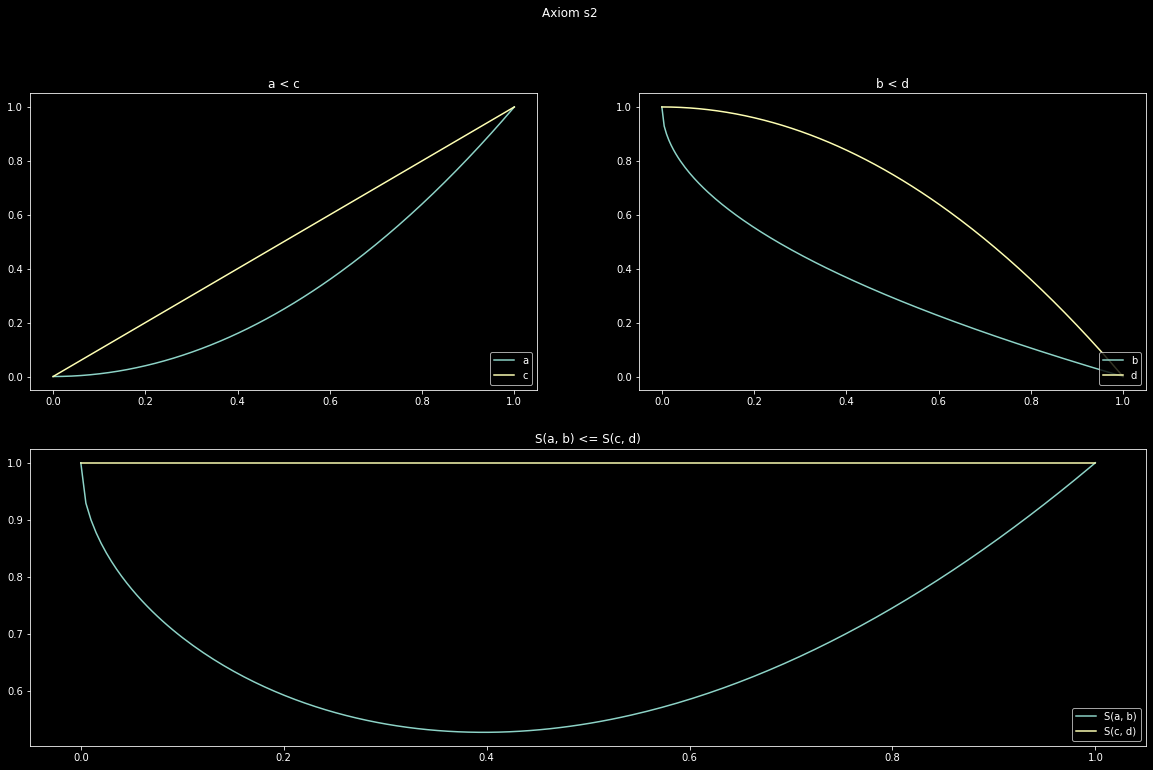

In [57]:
a = B
b = C
c = A
d = D

# Graph: a < c
figure = plt.figure(figsize=(20, 12))
gridShape = (2, 2)
legendLocation = 'lower right'

a11 = plt.subplot2grid(gridShape, (0, 0), fig=figure)
a11.plot(X, a, label='a')
a11.plot(X, c, label='c')

a11.set_title('a < c')
a11.legend(loc=legendLocation)

# Graph: b < d
a12 = plt.subplot2grid(gridShape, (0, 1), fig=figure)
a12.plot(X, b, label='b')
a12.plot(X, d, label='d')

a12.set_title('b < d')
a12.legend(loc=legendLocation)

# Graph: S(a, b) <= S(c, d)
S_ab = limitedSum(a, b)
S_cd = limitedSum(c, d)

a2 = plt.subplot2grid(gridShape, (1, 0), fig=figure, colspan=2)
a2.plot(X, S_ab, label='S(a, b)')
a2.plot(X, S_cd, label='S(c, d)')

a2.set_title('S(a, b) <= S(c, d)')
a2.legend(loc=legendLocation)
    
figure.suptitle('Axiom s2')
plt.show()

### Axiom s3:
$𝑆(𝑎,𝑏) = 𝑆(b,a)$

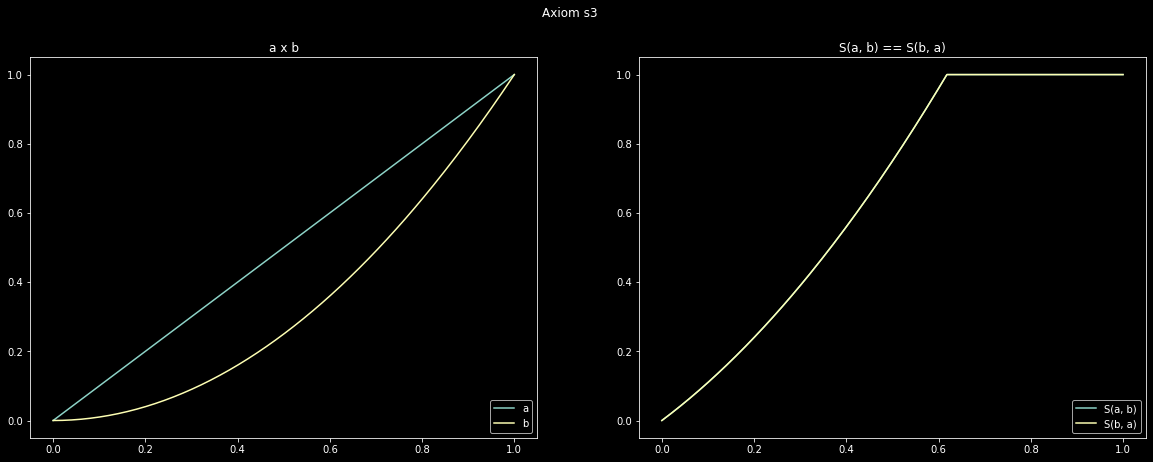

In [58]:
a = A
b = B

# Graph: a & b
figure = plt.figure(figsize=(20, 7))
gridShape = (1, 2)
legendLocation = 'lower right'

a1 = plt.subplot2grid(gridShape, (0, 0), fig=figure)
a1.plot(X, a, label='a')
a1.plot(X, b, label='b')

a1.set_title('a x b')
a1.legend(loc=legendLocation)

# Graph: S(a, b) === S(b, a)
S_ab = limitedSum(a, b)
S_ba = limitedSum(b, a)

a2 = plt.subplot2grid(gridShape, (0, 1), fig=figure)
a2.plot(X, S_ab, label='S(a, b)')
a2.plot(X, S_ba, label='S(b, a)')

a2.set_title('S(a, b) == S(b, a)')
a2.legend(loc=legendLocation)
    
figure.suptitle('Axiom s3')
plt.show()

### Axiom s4:
$S(a, 𝑆(𝑏, c)) = S(𝑆(𝑎, 𝑏), c)$

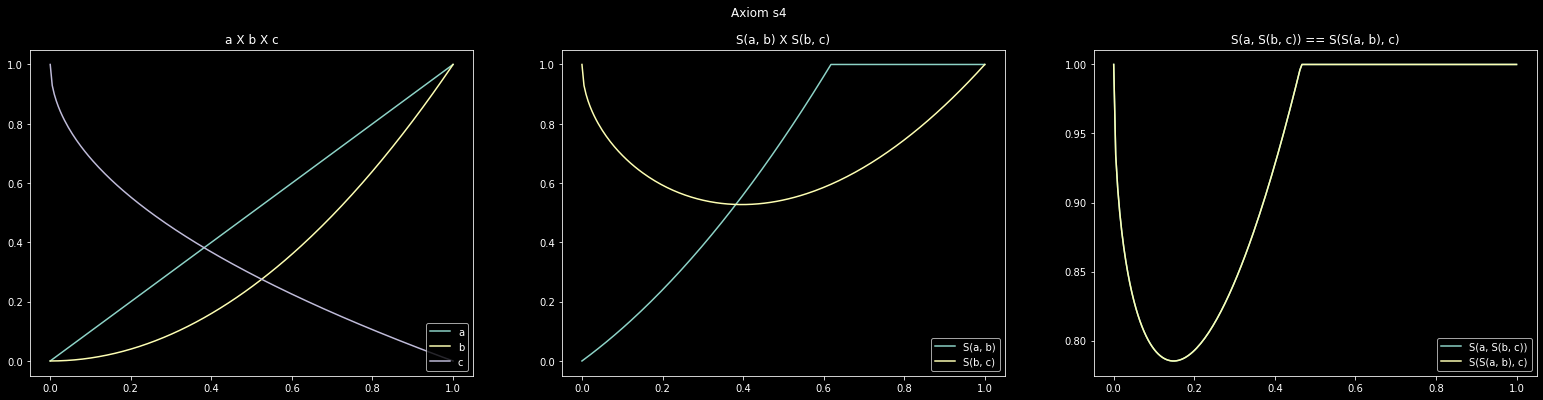

In [59]:
a = A
b = B
c = C

S_ab = limitedSum(a, b)
S_bc = limitedSum(b, c)

S_a_bc = limitedSum(a, S_bc)
S_ab_c = limitedSum(S_ab, c)

figure = plt.figure(figsize=(27, 6))
gridShape = (1, 3)
legendLocation = 'lower right'

# Graph: 01
a1 = plt.subplot2grid(gridShape, (0, 0), fig=figure)
a1.plot(X, a, label='a')
a1.plot(X, b, label='b')
a1.plot(X, c, label='c')

a1.set_title('a X b X c')
a1.legend(loc=legendLocation)

# Graph: 02
a2 = plt.subplot2grid(gridShape, (0, 1), fig=figure)
a2.plot(X, S_ab, label='S(a, b)')
a2.plot(X, S_bc, label='S(b, c)')

a2.set_title('S(a, b) X S(b, c)')
a2.legend(loc=legendLocation)

# Graph: 03
a3 = plt.subplot2grid(gridShape, (0, 2), fig=figure)
a3.plot(X, S_a_bc, label='S(a, S(b, c))')
a3.plot(X, S_ab_c, label='S(S(a, b), c)')

a3.set_title('S(a, S(b, c)) == S(S(a, b), c)')
a3.legend(loc=legendLocation)
    
figure.suptitle('Axiom s4')
plt.show()

## 06: Prove that _product_ complies with the axioms `t1`, `t2`, `t3`, and `t4`

In [60]:
def product(setA: np.array, setB: np.array) -> np.array:
    return setA * setB

### Axiom t1:
$T(0, 0) = 0 \text{ and } \text{ } T(a, 1) = T(1, a) = a$

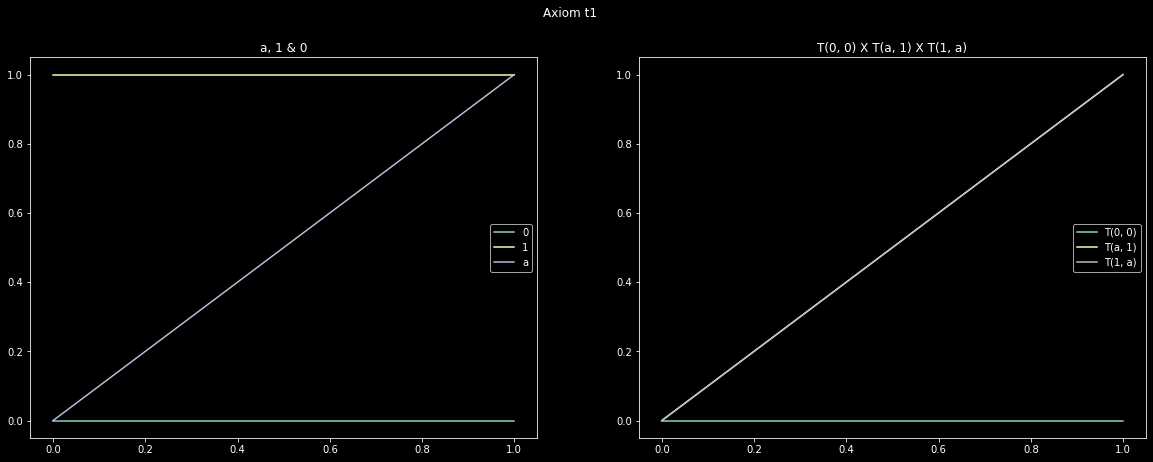

In [61]:
a = A
t_00 = product(zeroSet, zeroSet)
t_a1 = product(a, oneSet)
t_1a = product(oneSet, a)

figure = plt.figure(figsize=(20, 7))
gridShape = (1, 2)
legendLocation = 'right'

# Graph: 01
a1 = plt.subplot2grid(gridShape, (0, 0), fig=figure)
a1.plot(X, zeroSet, label='0')
a1.plot(X, oneSet, label='1')
a1.plot(X, a, label='a')
a1.set_title('a, 1 & 0')
a1.legend(loc=legendLocation)

# Graph: 02
a1 = plt.subplot2grid(gridShape, (0, 1), fig=figure)
a1.plot(X, t_00, label='T(0, 0)')
a1.plot(X, t_a1, label='T(a, 1)')
a1.plot(X, t_1a, label='T(1, a)')
a1.set_title('T(0, 0) X T(a, 1) X T(1, a)')
a1.legend(loc=legendLocation)
    
figure.suptitle('Axiom t1')
plt.show()


### Axiom t2:
$a \le c; \text{ } \text{ } b \le d \longrightarrow T(a, b) \le T(c, d)$

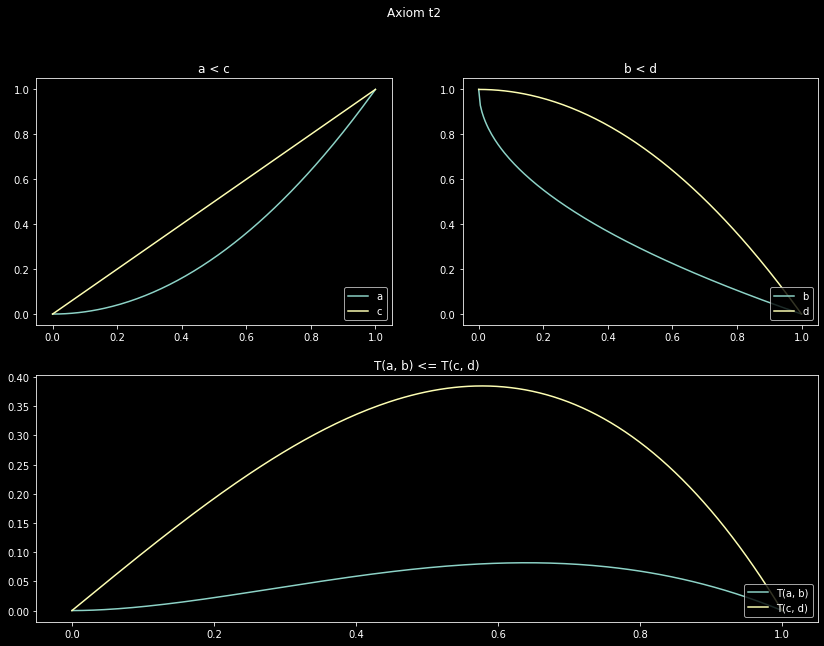

In [62]:
a = B
b = C
c = A
d = D

T_ab = product(a, b)
T_cd = product(c, d)

figure = plt.figure(figsize=(14, 10))
gridShape = (2, 2)
legendLocation = 'lower right'

# Graph: 01
a11 = plt.subplot2grid(gridShape, (0, 0), fig=figure)
a11.plot(X, a, label='a')
a11.plot(X, c, label='c')

a11.set_title('a < c')
a11.legend(loc=legendLocation)

# Graph: 02
a12 = plt.subplot2grid(gridShape, (0, 1), fig=figure)
a12.plot(X, b, label='b')
a12.plot(X, d, label='d')

a12.set_title('b < d')
a12.legend(loc=legendLocation)

# Graph: 03
a2 = plt.subplot2grid(gridShape, (1, 0), fig=figure, colspan=2)
a2.plot(X, T_ab, label='T(a, b)')
a2.plot(X, T_cd, label='T(c, d)')

a2.set_title('T(a, b) <= T(c, d)')
a2.legend(loc=legendLocation)
    
figure.suptitle('Axiom t2')
plt.show()

### Axiom t3:
$T(a, b) = T(b, a)$

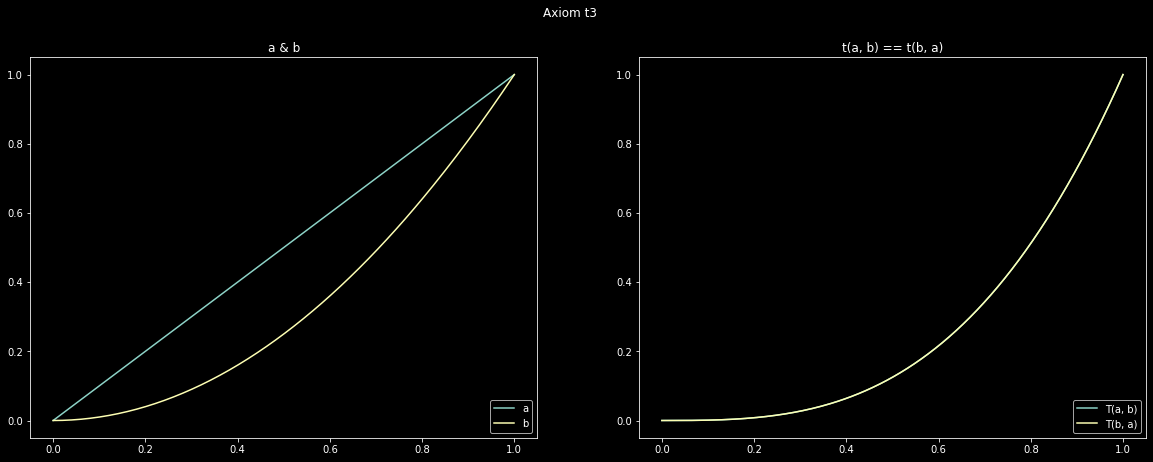

In [63]:
a = A
b = B

T_ab = product(a, b)
T_ba = product(b, a)

figure = plt.figure(figsize=(20, 7))
gridShape = (1, 2)
legendLocation = 'lower right'

# Graph: 01
a1 = plt.subplot2grid(gridShape, (0, 0), fig=figure)
a1.plot(X, a, label='a')
a1.plot(X, b, label='b')

a1.set_title('a & b')
a1.legend(loc=legendLocation)

# Graph: 02
a2 = plt.subplot2grid(gridShape, (0, 1), fig=figure)
a2.plot(X, T_ab, label='T(a, b)')
a2.plot(X, T_ba, label='T(b, a)')

a2.set_title('t(a, b) == t(b, a)')
a2.legend(loc=legendLocation)
    
figure.suptitle('Axiom t3')
plt.show()

### Axiom t4:
$T(a, T(b, c)) = T(T(a, b), c)$

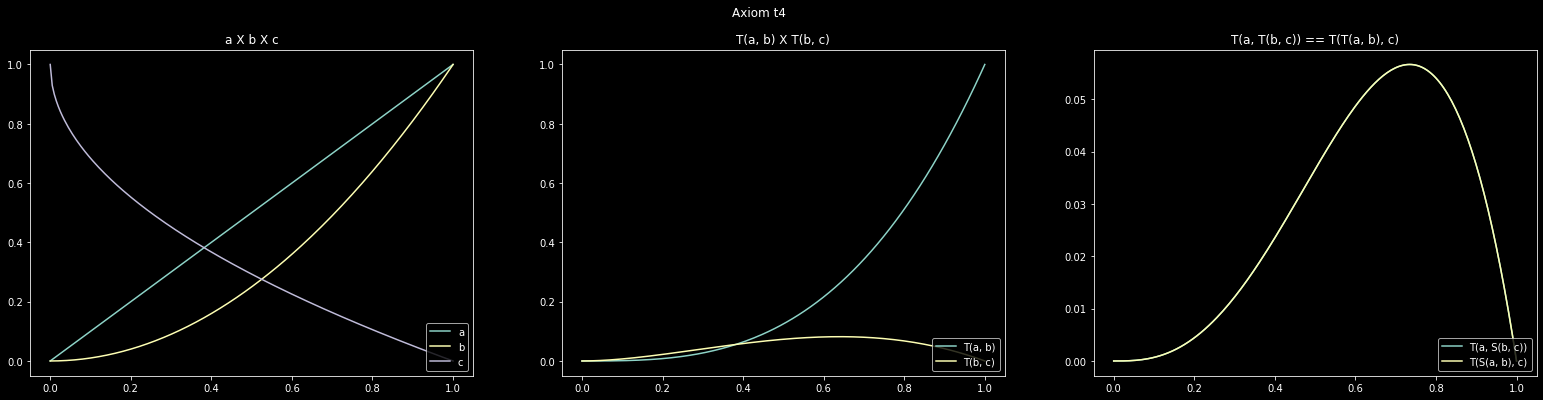

In [64]:
a = A
b = B
c = C

T_ab = product(a, b)
T_bc = product(b, c)

T_a_bc = product(a, T_bc)
T_ab_c = product(T_ab, c)

figure = plt.figure(figsize=(27, 6))
gridShape = (1, 3)
legendLocation = 'lower right'

# Graph: 01
a1 = plt.subplot2grid(gridShape, (0, 0), fig=figure)
a1.plot(X, a, label='a')
a1.plot(X, b, label='b')
a1.plot(X, c, label='c')

a1.set_title('a X b X c')
a1.legend(loc=legendLocation)

# Graph: 02
a2 = plt.subplot2grid(gridShape, (0, 1), fig=figure)
a2.plot(X, T_ab, label='T(a, b)')
a2.plot(X, T_bc, label='T(b, c)')

a2.set_title('T(a, b) X T(b, c)')
a2.legend(loc=legendLocation)

# Graph: 03
a3 = plt.subplot2grid(gridShape, (0, 2), fig=figure)
a3.plot(X, T_a_bc, label='T(a, S(b, c))')
a3.plot(X, T_ab_c, label='T(S(a, b), c)')

a3.set_title('T(a, T(b, c)) == T(T(a, b), c)')
a3.legend(loc=legendLocation)
    
figure.suptitle('Axiom t4')
plt.show()

## 07: Prove that _Limited Product_ complies with the axioms `t1`, `t2`, `t3`, and `t4`

In [65]:
def limitedProduct(setA: np.array, setB: np.array) -> np.array:
    f = lambda a, b: max(0, a + b - 1)
    return np.array(list(map(f, setA, setB)))

### Axiom t1:
$T(0, 0) = 0 \text{ and } \text{ } T(a, 1) = T(1, a) = a$

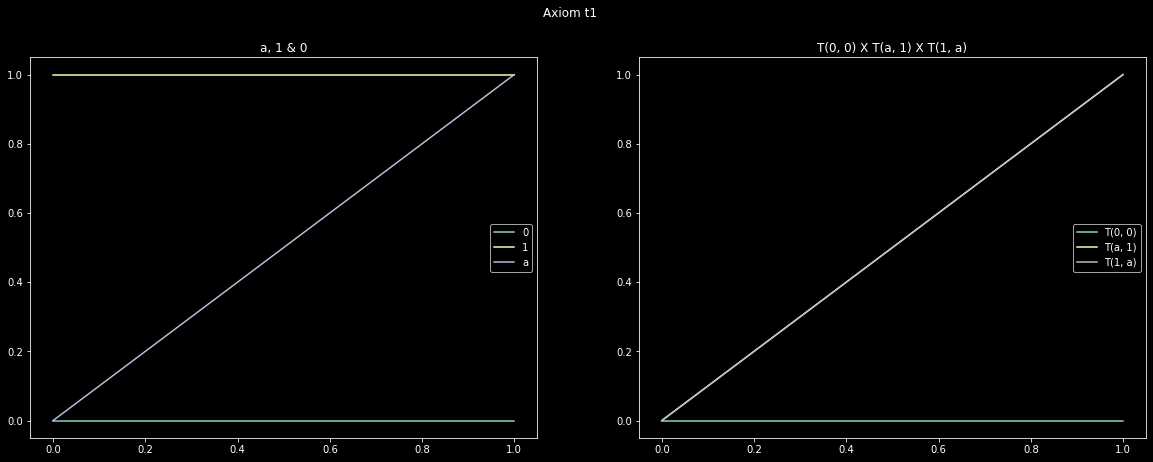

In [66]:
a = A
t_00 = limitedProduct(zeroSet, zeroSet)
t_a1 = limitedProduct(a, oneSet)
t_1a = limitedProduct(oneSet, a)

figure = plt.figure(figsize=(20, 7))
gridShape = (1, 2)
legendLocation = 'right'

# Graph: 01
a1 = plt.subplot2grid(gridShape, (0, 0), fig=figure)
a1.plot(X, zeroSet, label='0')
a1.plot(X, oneSet, label='1')
a1.plot(X, a, label='a')
a1.set_title('a, 1 & 0')
a1.legend(loc=legendLocation)

# Graph: 02
a1 = plt.subplot2grid(gridShape, (0, 1), fig=figure)
a1.plot(X, t_00, label='T(0, 0)')
a1.plot(X, t_a1, label='T(a, 1)')
a1.plot(X, t_1a, label='T(1, a)')
a1.set_title('T(0, 0) X T(a, 1) X T(1, a)')
a1.legend(loc=legendLocation)
    
figure.suptitle('Axiom t1')
plt.show()


### Axiom t2:
$a \le c; \text{ } \text{ } b \le d \longrightarrow T(a, b) \le T(c, d)$

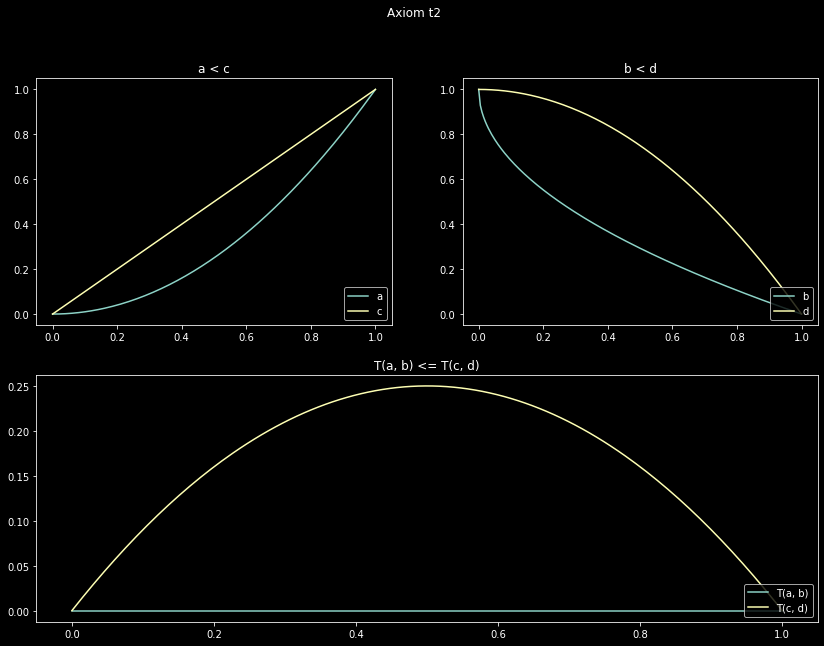

In [67]:
a = B
b = C
c = A
d = D

T_ab = limitedProduct(a, b)
T_cd = limitedProduct(c, d)

figure = plt.figure(figsize=(14, 10))
gridShape = (2, 2)
legendLocation = 'lower right'

# Graph: 01
a11 = plt.subplot2grid(gridShape, (0, 0), fig=figure)
a11.plot(X, a, label='a')
a11.plot(X, c, label='c')

a11.set_title('a < c')
a11.legend(loc=legendLocation)

# Graph: 02
a12 = plt.subplot2grid(gridShape, (0, 1), fig=figure)
a12.plot(X, b, label='b')
a12.plot(X, d, label='d')

a12.set_title('b < d')
a12.legend(loc=legendLocation)

# Graph: 03
a2 = plt.subplot2grid(gridShape, (1, 0), fig=figure, colspan=2)
a2.plot(X, T_ab, label='T(a, b)')
a2.plot(X, T_cd, label='T(c, d)')

a2.set_title('T(a, b) <= T(c, d)')
a2.legend(loc=legendLocation)
    
figure.suptitle('Axiom t2')
plt.show()

### Axiom t3:
$T(a, b) = T(b, a)$

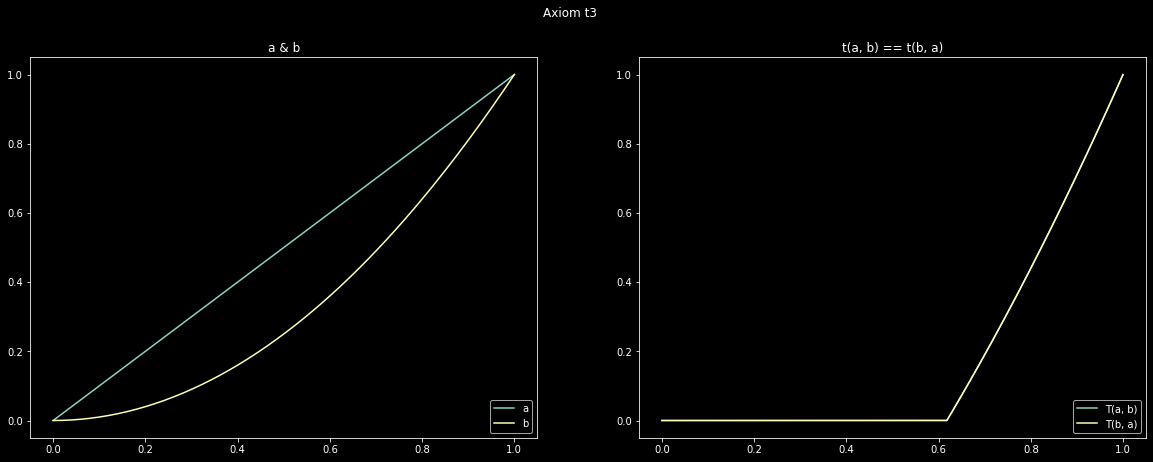

In [68]:
a = A
b = B

T_ab = limitedProduct(a, b)
T_ba = limitedProduct(b, a)

figure = plt.figure(figsize=(20, 7))
gridShape = (1, 2)
legendLocation = 'lower right'

# Graph: 01
a1 = plt.subplot2grid(gridShape, (0, 0), fig=figure)
a1.plot(X, a, label='a')
a1.plot(X, b, label='b')

a1.set_title('a & b')
a1.legend(loc=legendLocation)

# Graph: 02
a2 = plt.subplot2grid(gridShape, (0, 1), fig=figure)
a2.plot(X, T_ab, label='T(a, b)')
a2.plot(X, T_ba, label='T(b, a)')

a2.set_title('t(a, b) == t(b, a)')
a2.legend(loc=legendLocation)
    
figure.suptitle('Axiom t3')
plt.show()

### Axiom t4:
$T(a, T(b, c)) = T(T(a, b), c)$

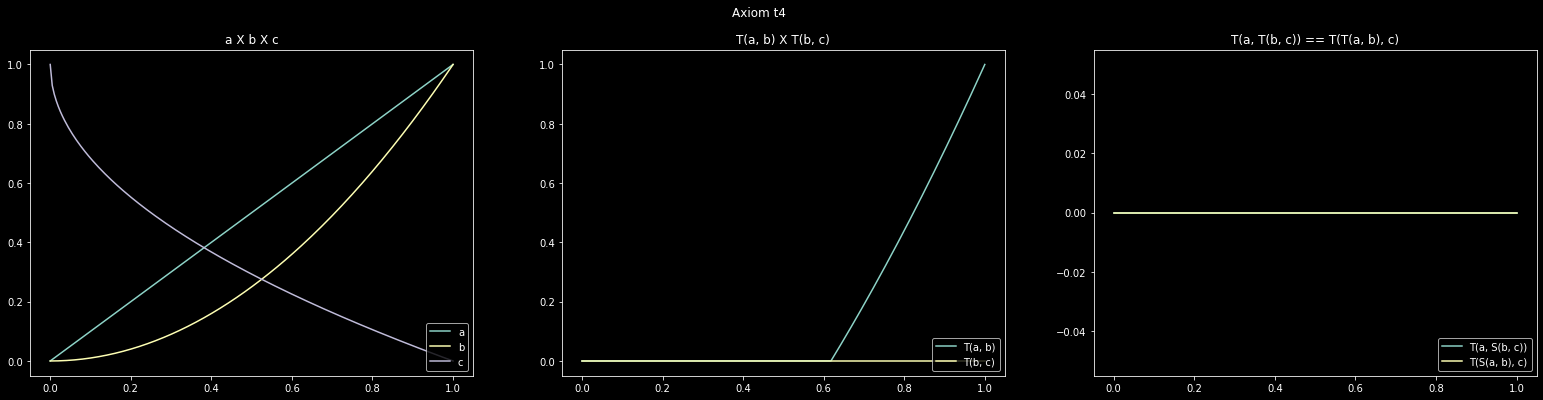

In [69]:
a = A
b = B
c = C

T_ab = limitedProduct(a, b)
T_bc = limitedProduct(b, c)

T_a_bc = limitedProduct(a, T_bc)
T_ab_c = limitedProduct(T_ab, c)

figure = plt.figure(figsize=(27, 6))
gridShape = (1, 3)
legendLocation = 'lower right'

# Graph: 01
a1 = plt.subplot2grid(gridShape, (0, 0), fig=figure)
a1.plot(X, a, label='a')
a1.plot(X, b, label='b')
a1.plot(X, c, label='c')

a1.set_title('a X b X c')
a1.legend(loc=legendLocation)

# Graph: 02
a2 = plt.subplot2grid(gridShape, (0, 1), fig=figure)
a2.plot(X, T_ab, label='T(a, b)')
a2.plot(X, T_bc, label='T(b, c)')

a2.set_title('T(a, b) X T(b, c)')
a2.legend(loc=legendLocation)

# Graph: 03
a3 = plt.subplot2grid(gridShape, (0, 2), fig=figure)
a3.plot(X, T_a_bc, label='T(a, S(b, c))')
a3.plot(X, T_ab_c, label='T(S(a, b), c)')

a3.set_title('T(a, T(b, c)) == T(T(a, b), c)')
a3.legend(loc=legendLocation)
    
figure.suptitle('Axiom t4')
plt.show()

## 08: Prove that _Probabilistic Sum_ and the _Product_ are dual operators related to _Zadeh's Complement_
> Use _Generalized De-Morgan Law_: $T(a, b) = N( S( N(a), N(b) ) )$

In [70]:
def zadehsComplement(set: np.array) -> np.array:
    return 1 - set

In [71]:
print('WTF !??')

WTF !??


## 09: Implement some _Pertinence Functions_

In [72]:
X = getX(10)

### _Triangular_ Pertinence Function

In [73]:
def triangularForOne(x: float, a: float, b: float, c: float) -> float:

    if x <= a or c <= x:
        return 0
    if a <= x and x <= b:
        return (x - a) / (b - a)
    if b <= x and x <= c:
        return (c - x) / (c - b)

    raise ValueError('Invalid parameteres. It should be like: a < b < c')

def triangular(set: np.array, a: float, b: float, c: float) -> np.array:
    f = lambda x: triangularForOne(x, a, b, c)
    return np.array(list(map(f, set)))


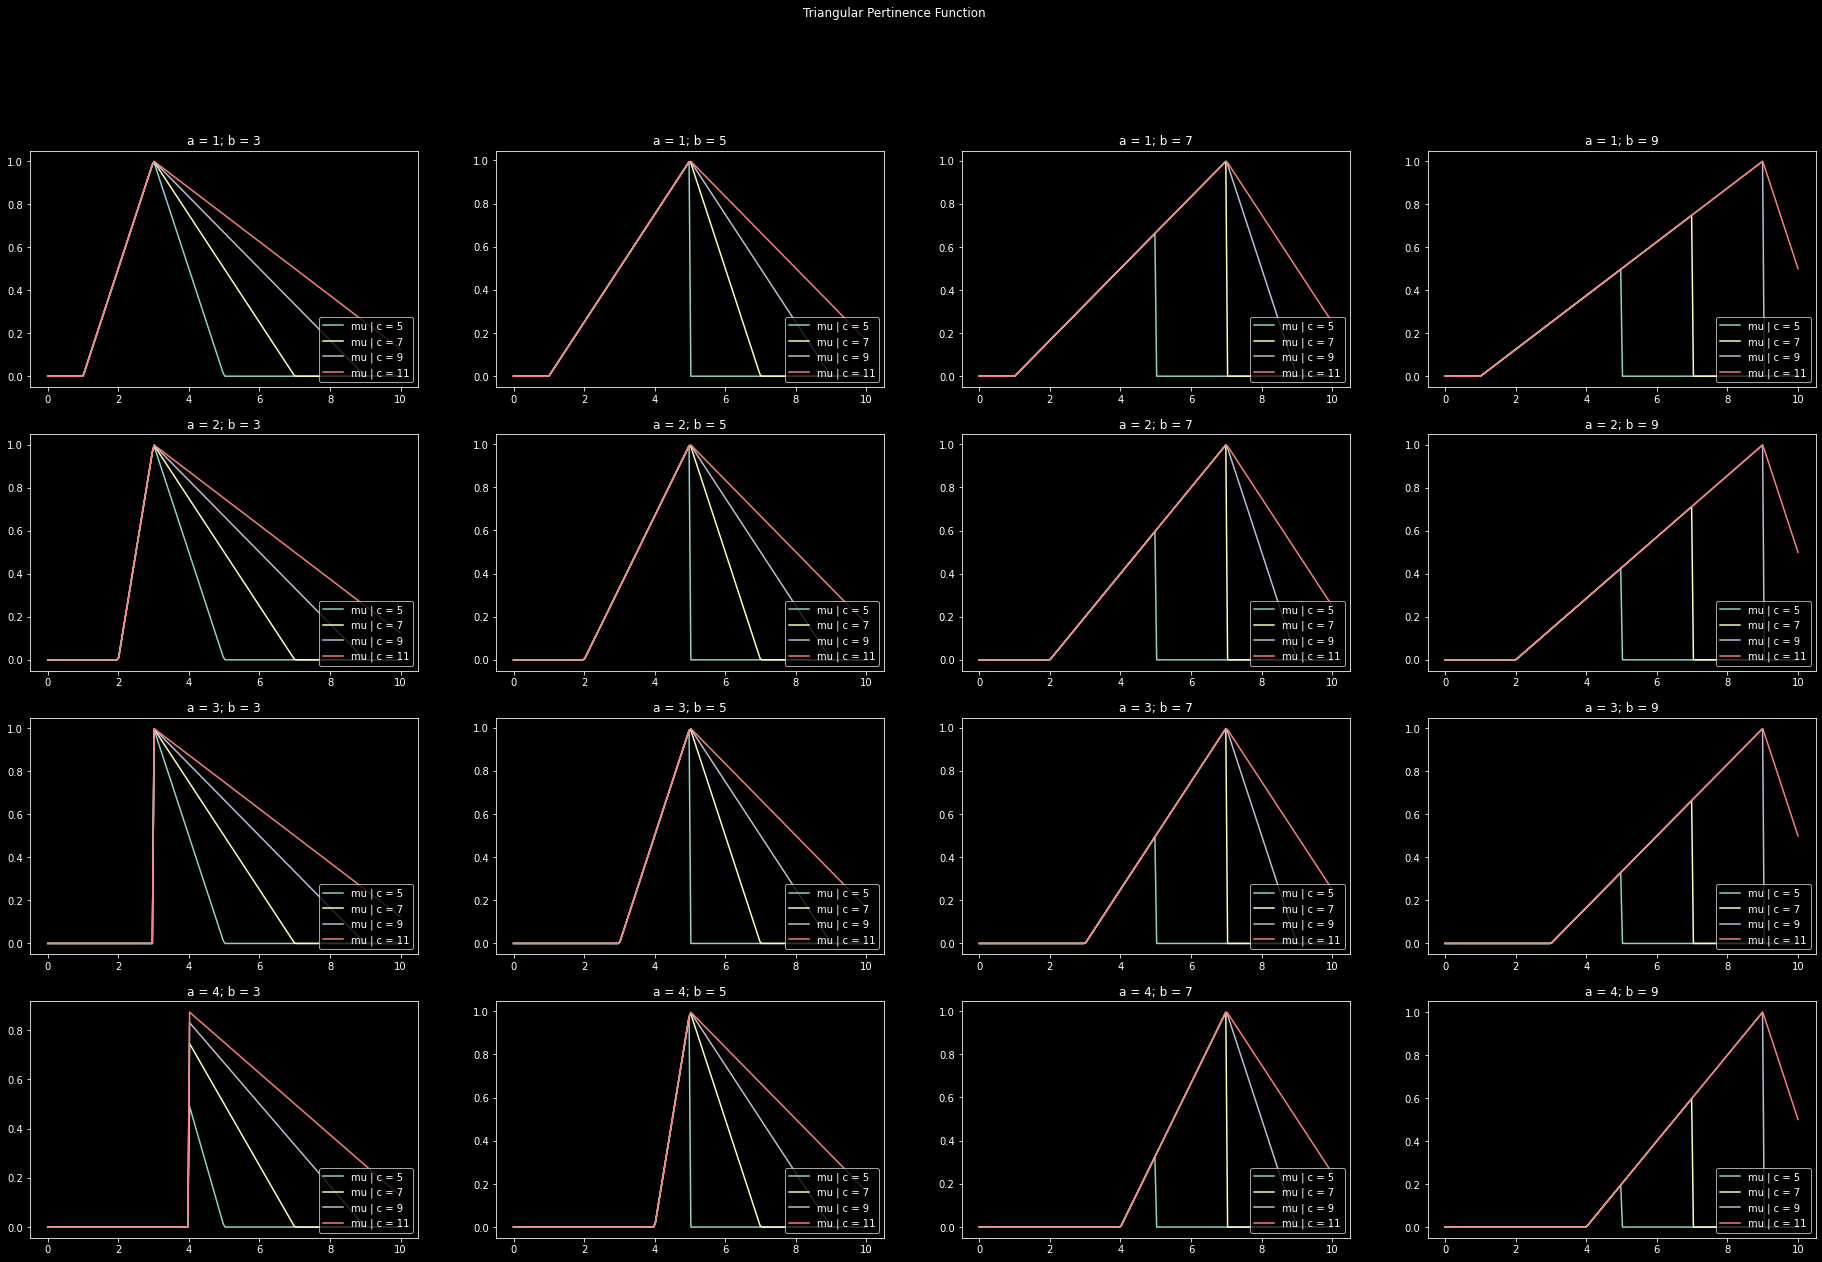

In [74]:

figSize = (32, 20)
gridShape = (4, 4)
legendLocation = 'lower right'

figure = plt.figure(figsize=(figSize))

for i, a in enumerate([1, 2, 3, 4]):
    for j, b in enumerate([3, 5, 7, 9]):
        ax = plt.subplot2grid(gridShape, (i, j), fig=figure)
        
        for c in [5, 7, 9, 11]:
            f = triangular(X, a, b, c)
            ax.plot(X, f, label='mu | c = ' + str(c))

        ax.set_title('a = ' + str(a) + '; b = ' + str(b))
        ax.legend(loc=legendLocation)
            

figure.suptitle('Triangular Pertinence Function')
plt.show()


### _Trapezium_ Pertinence Function

In [75]:
def trapeziumForOne(x: float, a: float, b: float, c: float, d: float) -> float:

    if x <= a or c <= x:
        return 0
    if a <= x and x <= b:
        return (x - a) / (b - a)
    if b <= x and c <= d:
        return 1
    if c <= x and x <= d:
        return (c - x) / (c - b)

    raise ValueError('Invalid parameteres. It should be like: a < b <= c < d')

def trapezium(set: np.array, a: float, b: float, c: float, d: float) -> np.array:
    f = lambda x: trapeziumForOne(x, a, b, c, d)
    return np.array(list(map(f, set)))


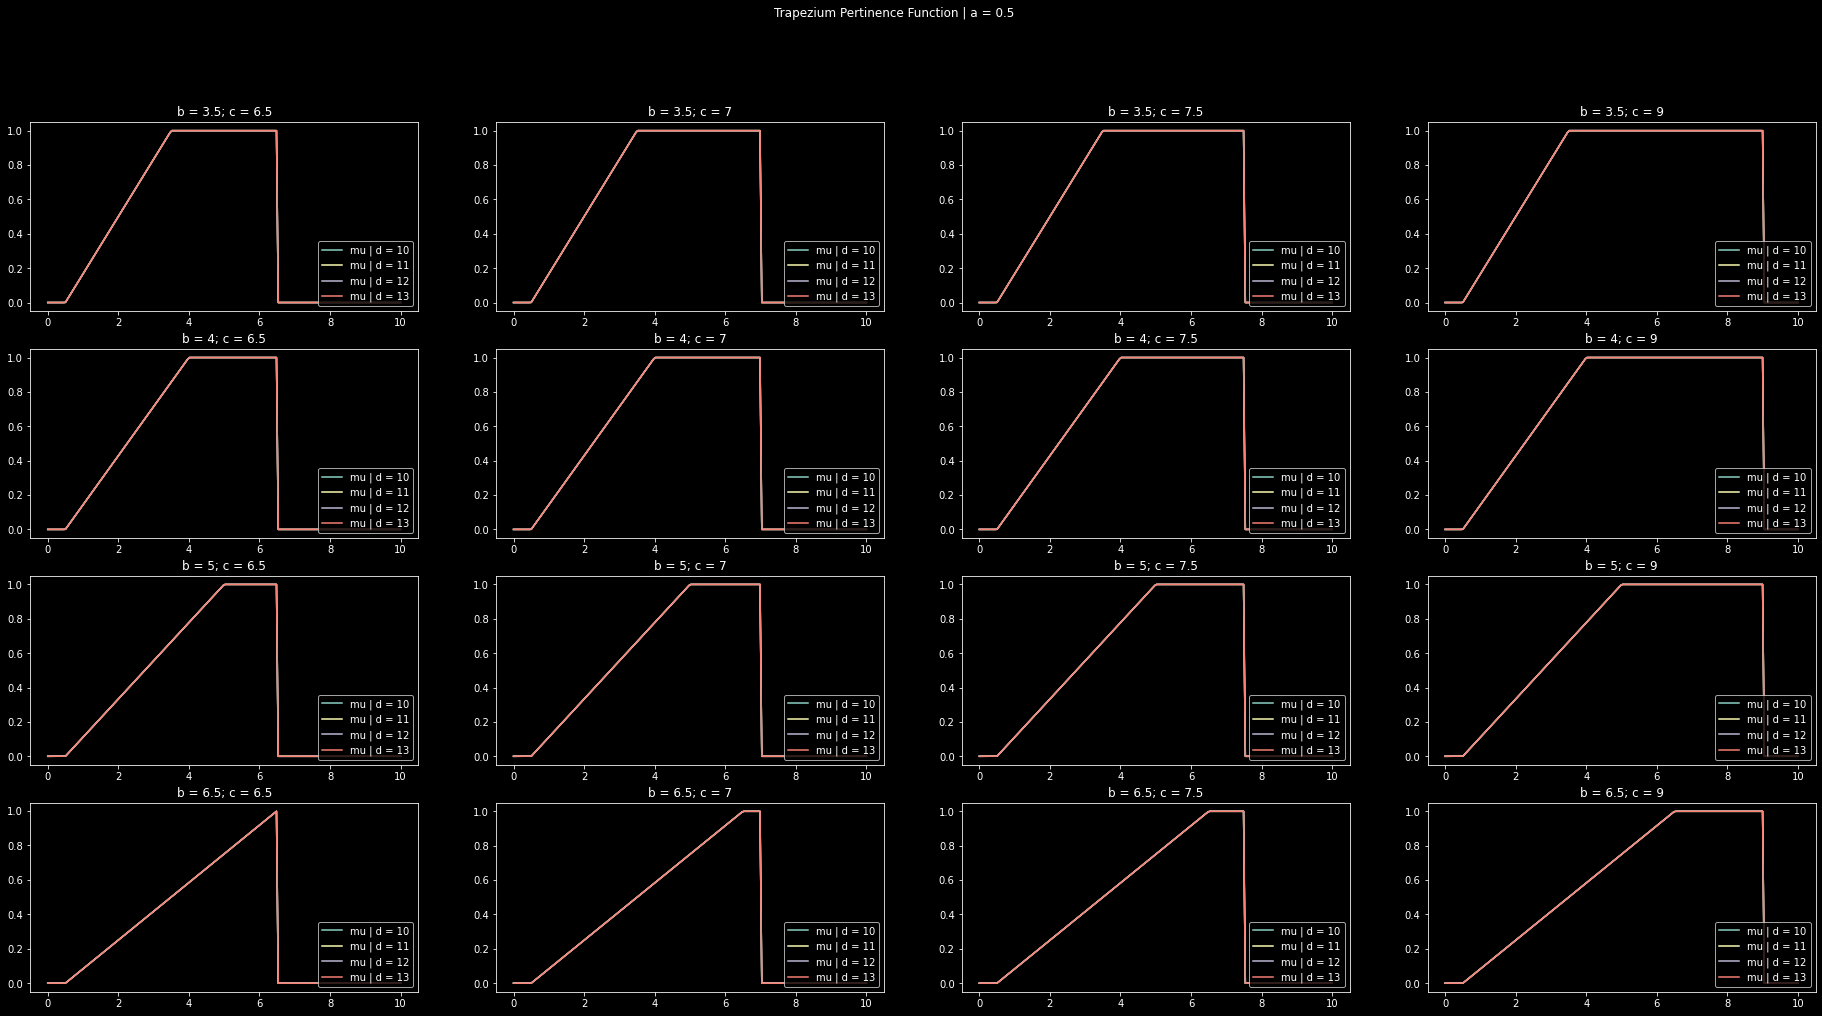

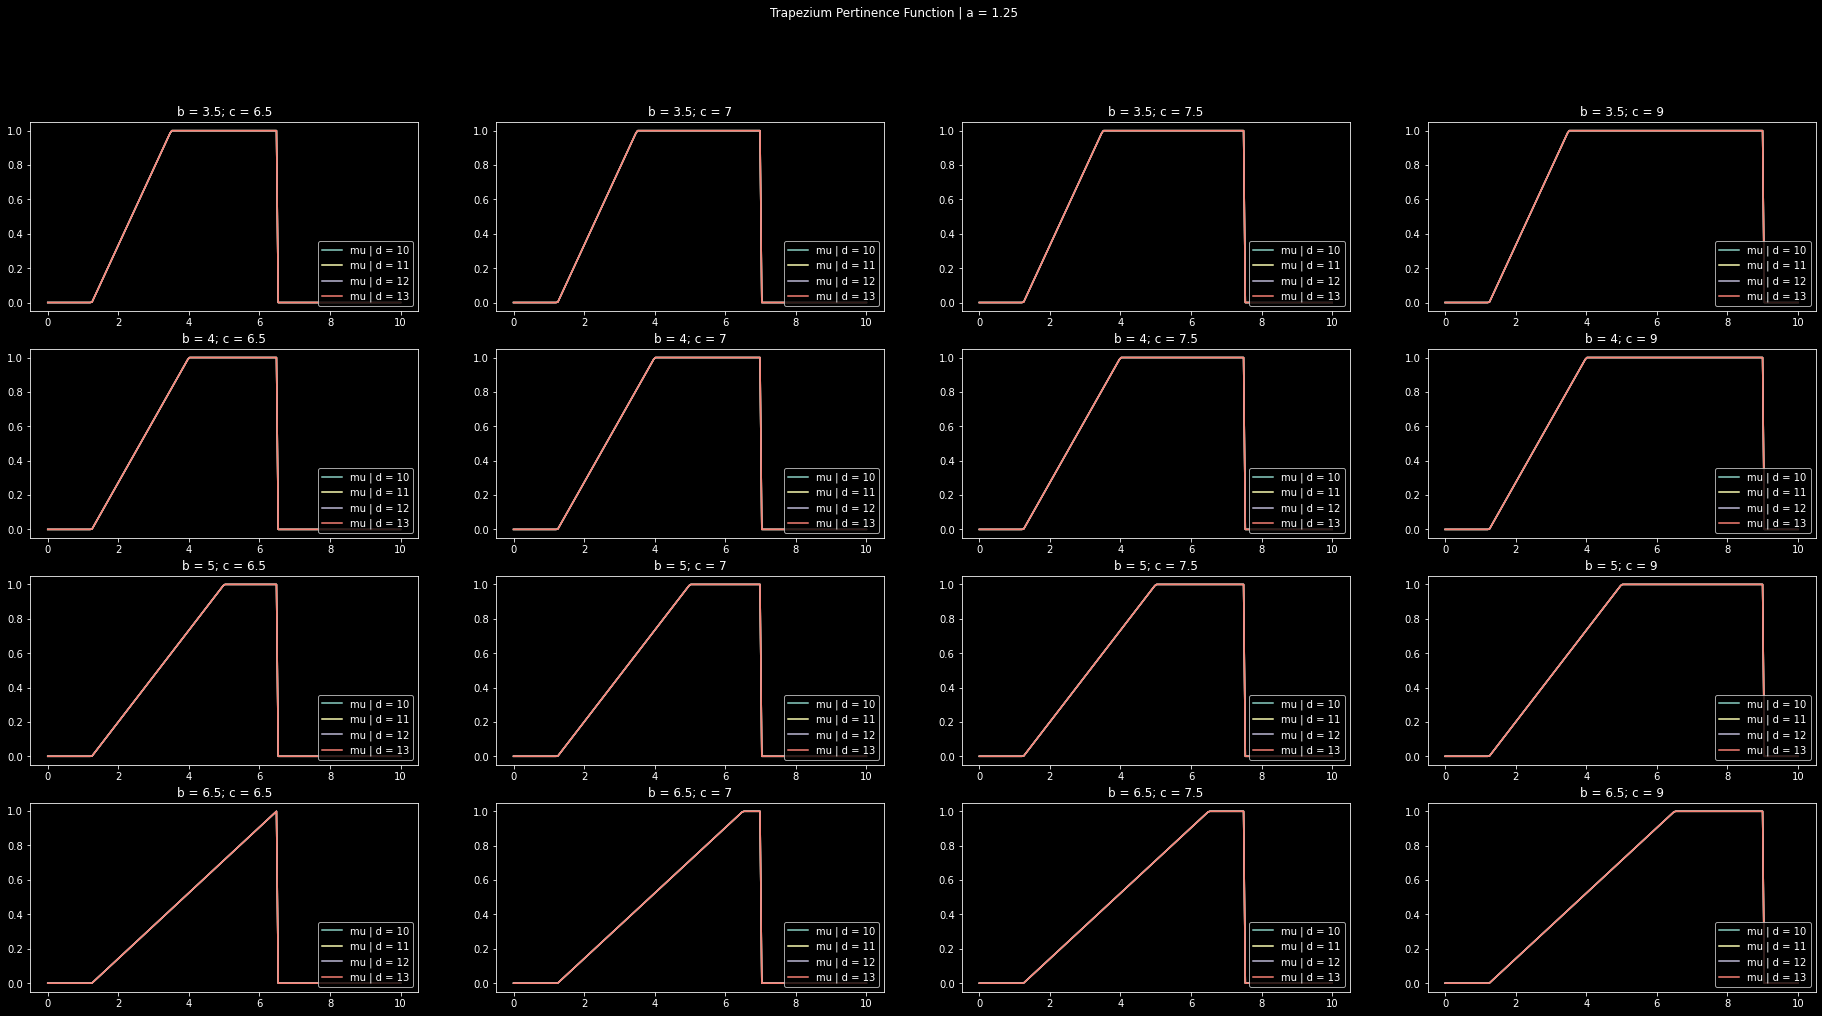

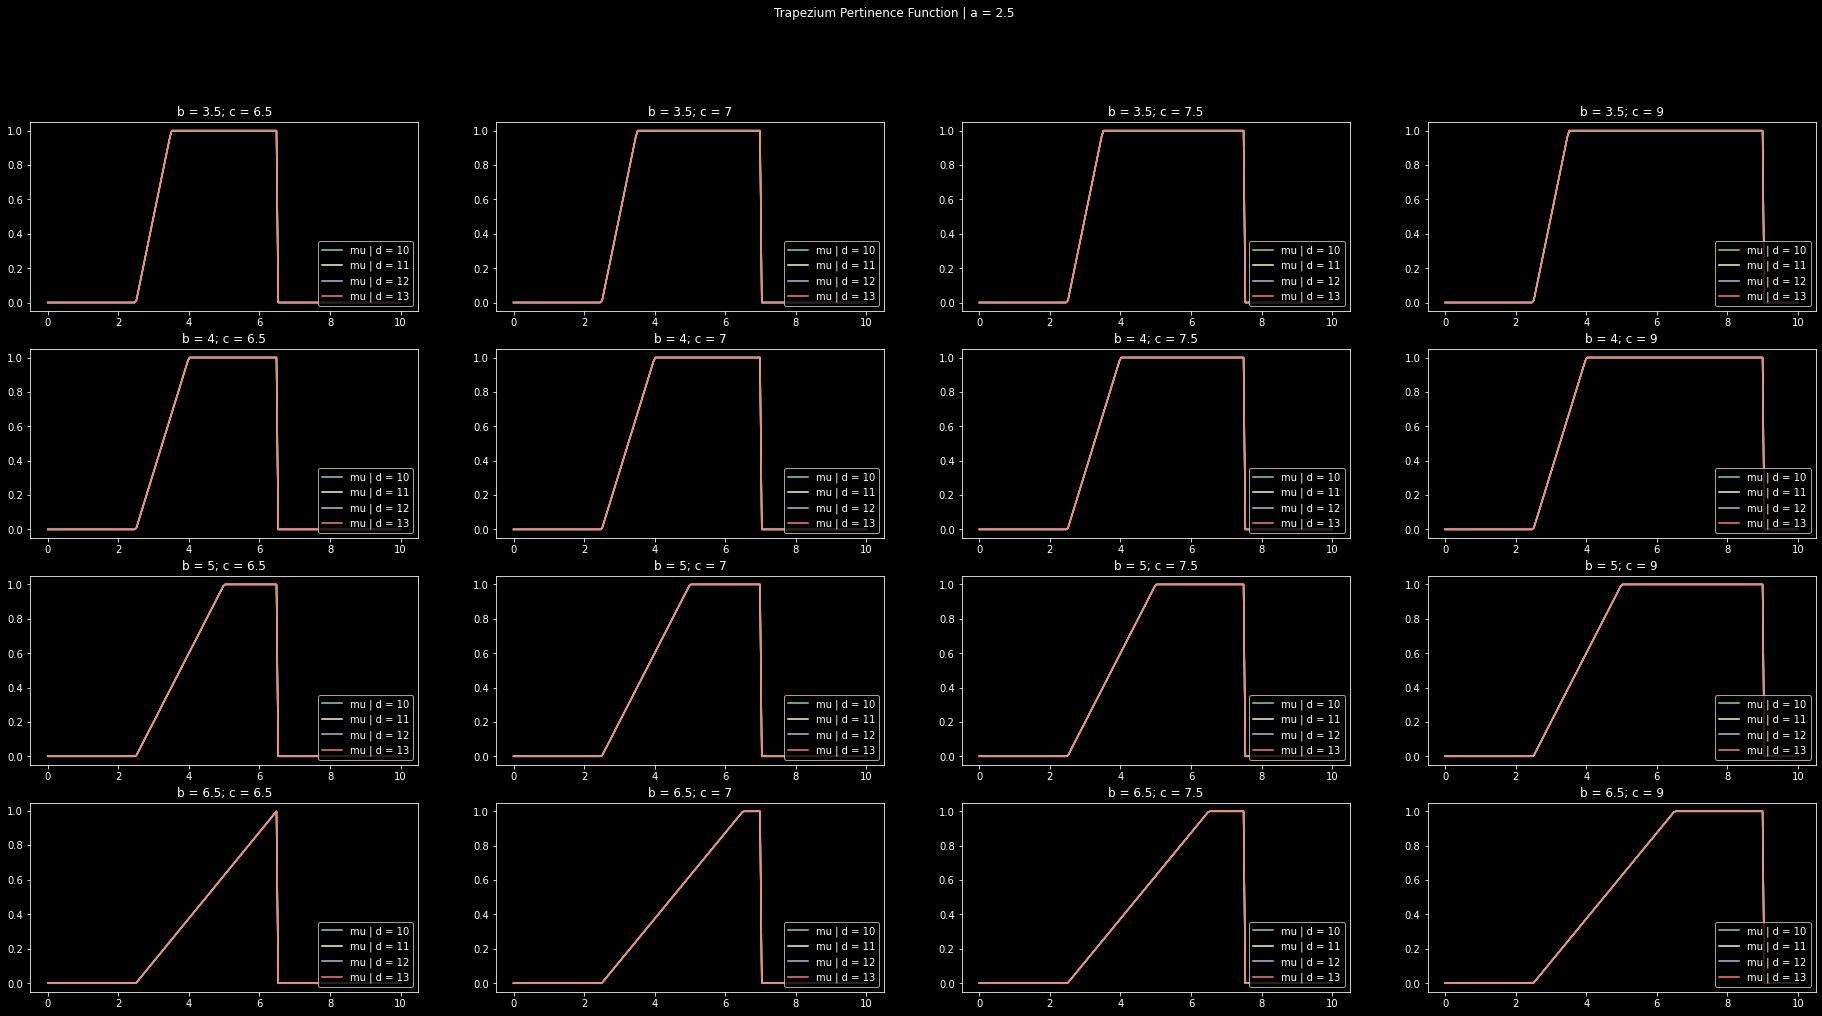

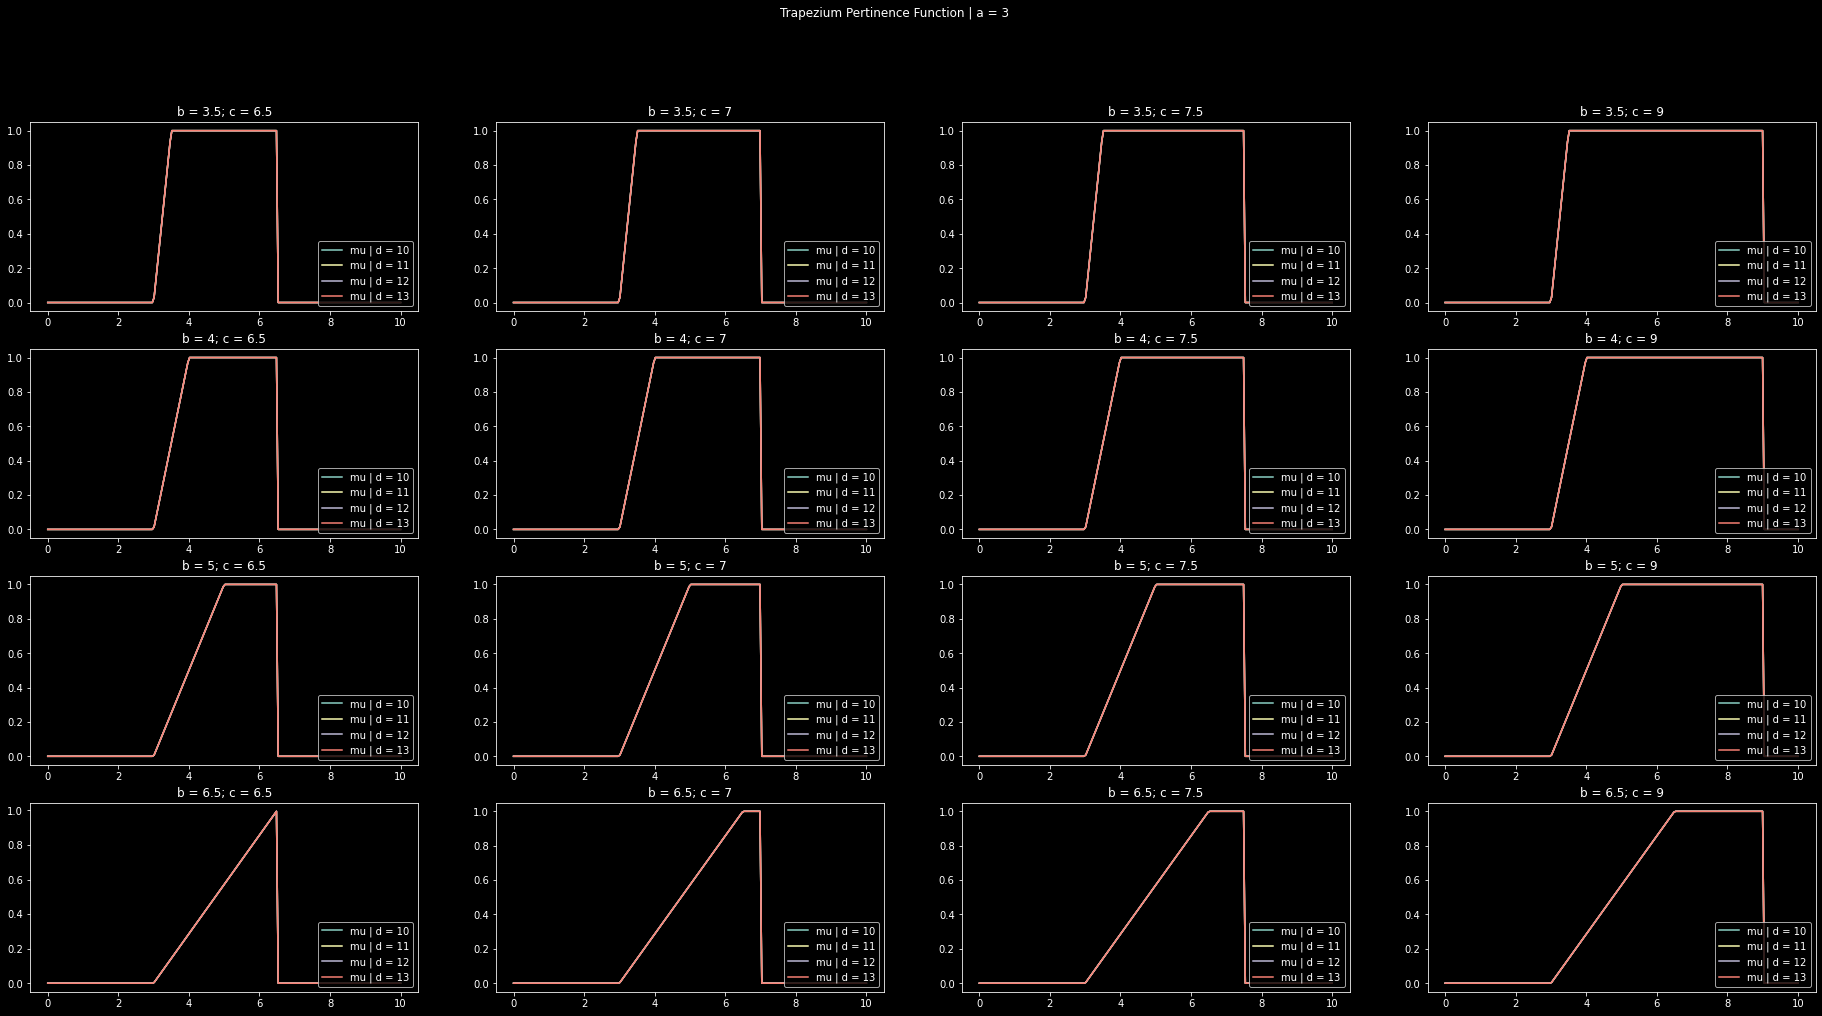

In [76]:

figSize = (32, 16)
gridShape = (4, 4)
legendLocation = 'lower right'

for i, a in enumerate([.5, 1.25, 2.5, 3]):
    figure = plt.figure(figsize=(figSize))
    
    for j, b in enumerate([3.5, 4, 5, 6.5]):
        for k, c in enumerate([6.5, 7, 7.5, 9]):
            ax = plt.subplot2grid(gridShape, (j, k), fig=figure)
        
            for d in [10, 11, 12, 13]:
                f = trapezium(X, a, b, c, d)
                ax.plot(X, f, label='mu | d = ' + str(d))

            ax.set_title('b = ' + str(b) + '; c = ' + str(c))
            ax.legend(loc=legendLocation)

    figure.suptitle('Trapezium Pertinence Function | a = ' + str(a))
    plt.show()


### _Gaussian_ Pertinence Function

In [77]:
def gaussian(set: np.array, c: float, sigma: float) -> np.array:
    f = lambda x: math.exp( -.5 * (x - c / sigma)**2 )
    return np.array(list(map(f, set)))


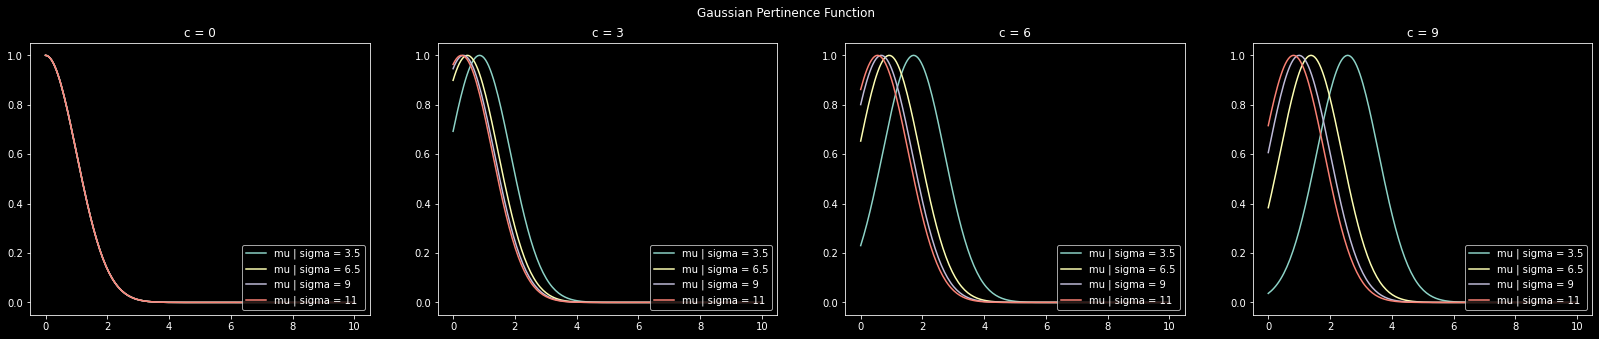

In [78]:

figure = plt.figure(figsize=(28, 5))
gridShape = (1, 4)
legendLocation = 'lower right'

for i, c in enumerate([0, 3, 6, 9]):
    ax = plt.subplot2grid(gridShape, (0, i), fig=figure)
    
    for sigma in [3.5, 6.5, 9, 11]:
        f = gaussian(X, c, sigma)
        ax.plot(X, f, label='mu | sigma = ' + str(sigma))
        ax.set_title('c = ' + str(c))
        ax.legend(loc=legendLocation)

figure.suptitle('Gaussian Pertinence Function')
plt.show()


### _Generalized Sine_ Pertinence Function

In [79]:
def generalizedSine(set: np.array, a: float, b: float, c: float) -> np.array:
    f = lambda x: 1 / (1 + math.fabs(x - c / a)**(2*b) )
    return np.array(list(map(f, set)))


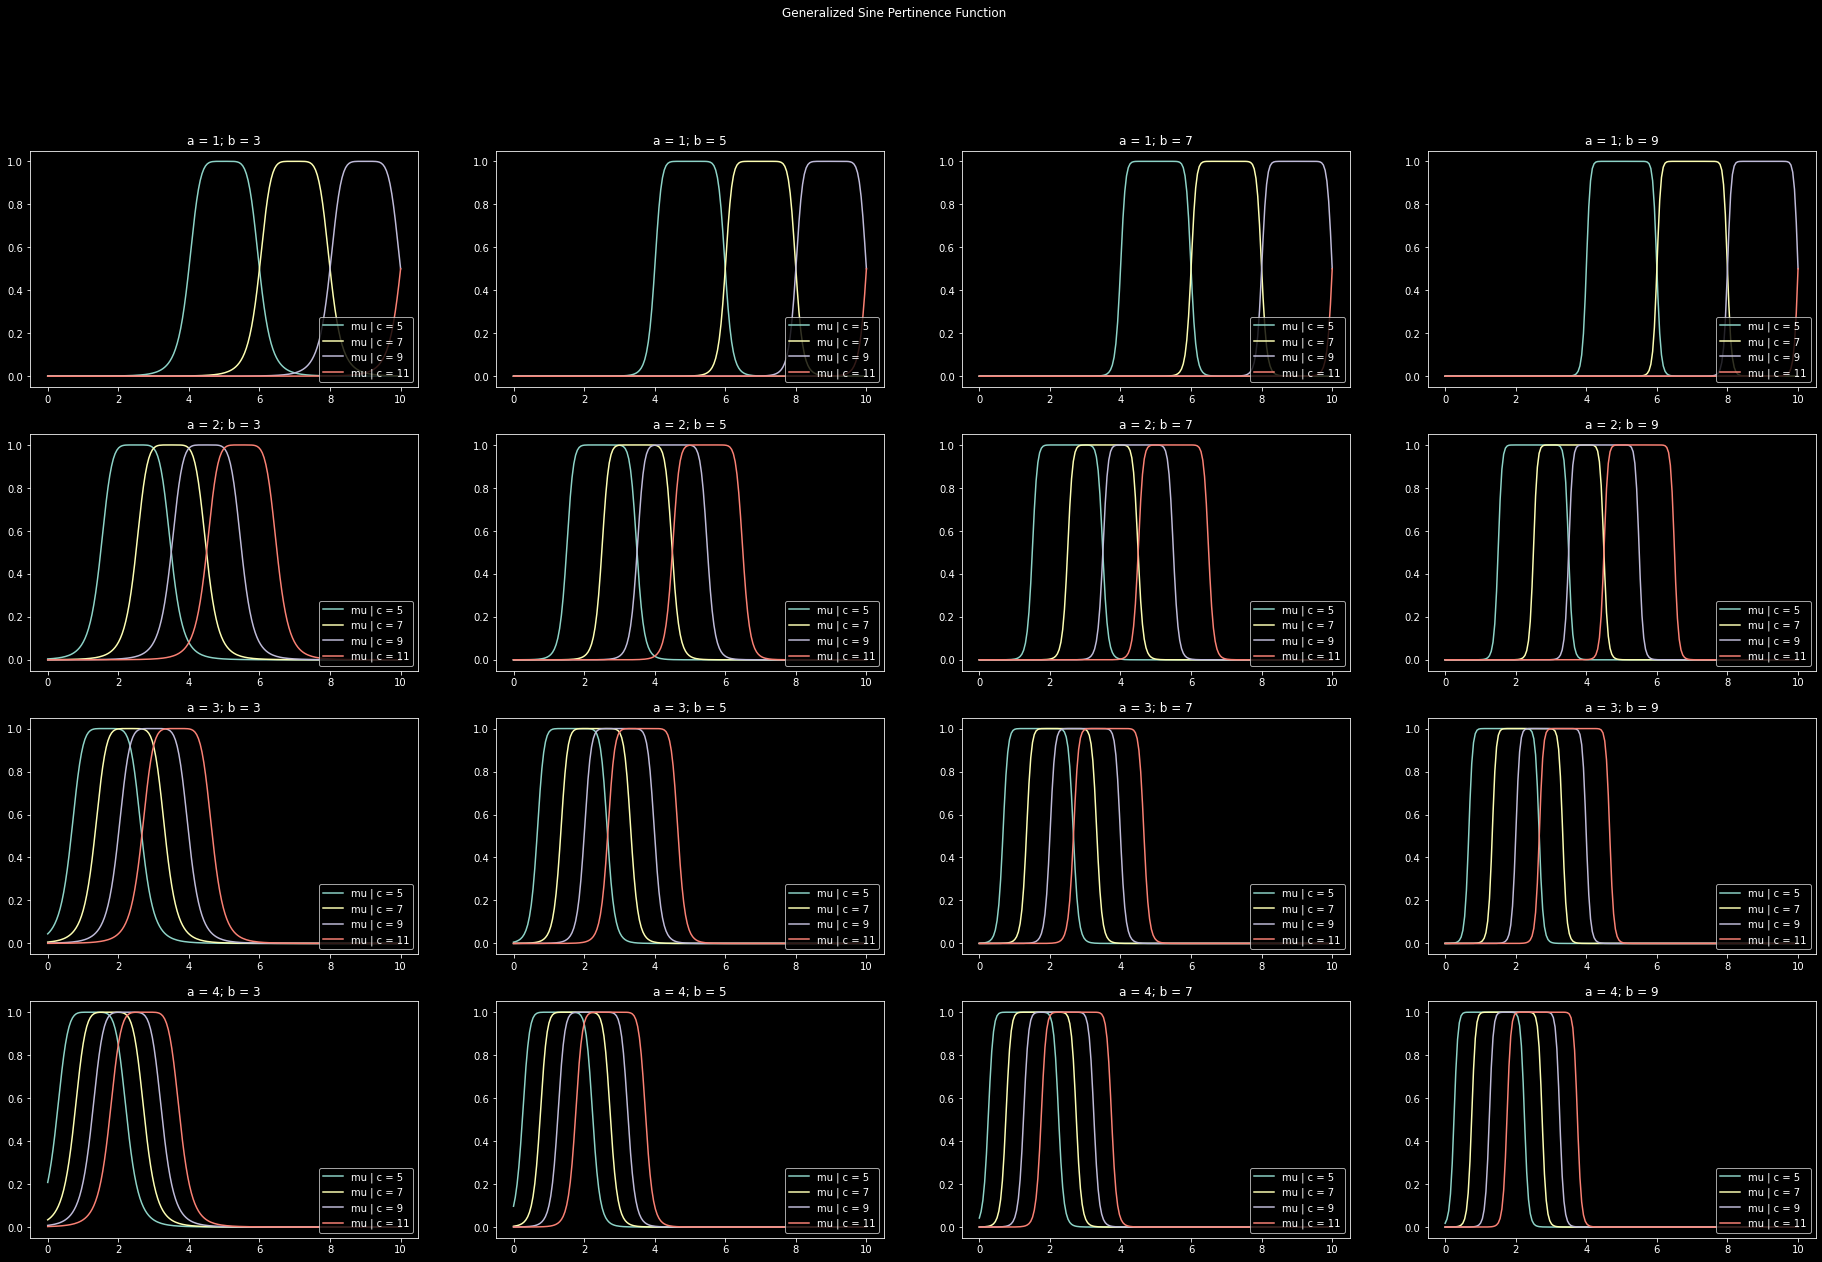

In [80]:

figSize = (32, 20)
gridShape = (4, 4)
legendLocation = 'lower right'

figure = plt.figure(figsize=(figSize))

for i, a in enumerate([1, 2, 3, 4]):
    for j, b in enumerate([3, 5, 7, 9]):
        ax = plt.subplot2grid(gridShape, (i, j), fig=figure)
        
        for c in [5, 7, 9, 11]:
            f = generalizedSine(X, a, b, c)
            ax.plot(X, f, label='mu | c = ' + str(c))

        ax.set_title('a = ' + str(a) + '; b = ' + str(b))
        ax.legend(loc=legendLocation)
            

figure.suptitle('Generalized Sine Pertinence Function')
plt.show()


### _Sigmoid_ Pertinence Function

In [81]:
def sigmoid(set: np.array, a: float, c: float) -> np.array:
    f = lambda x: 1 / (1 + math.exp(-a * (x - c)))
    return np.array(list(map(f, set)))


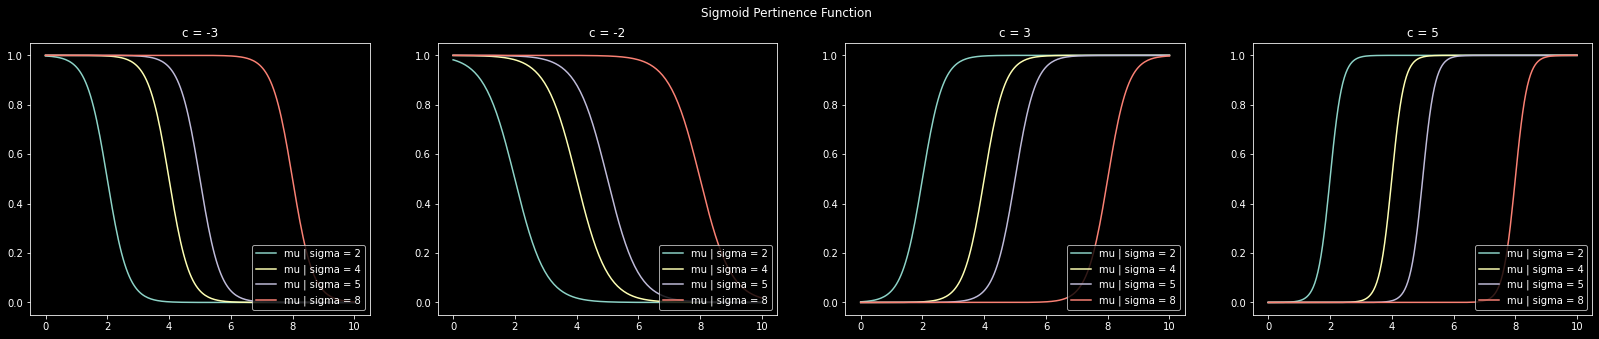

In [82]:

figure = plt.figure(figsize=(28, 5))
gridShape = (1, 4)
legendLocation = 'lower right'

for i, c in enumerate([-3, -2, 3, 5]):
    ax = plt.subplot2grid(gridShape, (0, i), fig=figure)
    
    for sigma in [2, 4, 5, 8]:
        f = sigmoid(X, c, sigma)
        ax.plot(X, f, label='mu | sigma = ' + str(sigma))
        ax.set_title('c = ' + str(c))
        ax.legend(loc=legendLocation)

figure.suptitle('Sigmoid Pertinence Function')
plt.show()
